# <span style="color:red">**Complete Blood Count**</sapn>

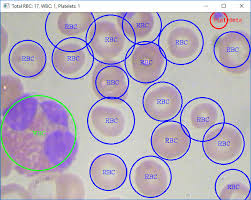

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# Display function
def display(img_rgb, closing, result_img, channel, cell_count):
    if channel == 4:
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img_rgb)
        plt.title("OG Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(closing, cmap="gray")
        plt.title("Thresholded + Morphological")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(result_img)
        plt.title(f"Detected Cells: {cell_count}")
        plt.axis("off")

        plt.show()

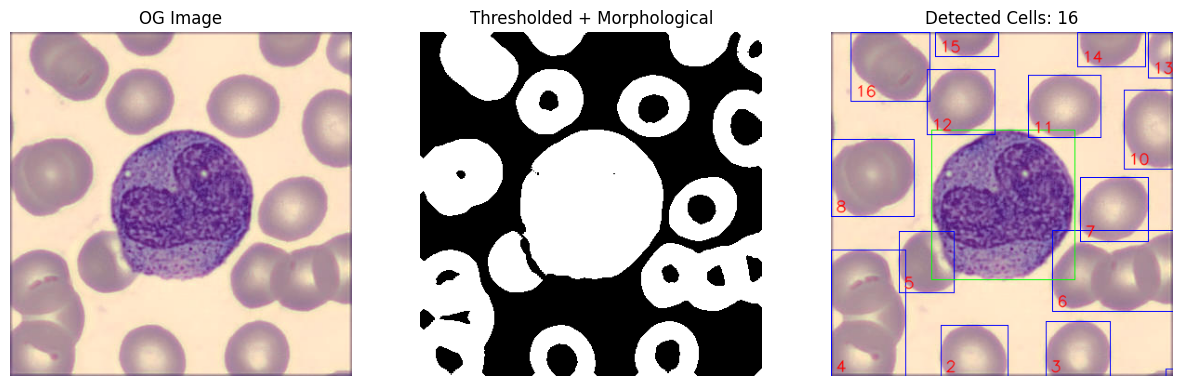

In [92]:


# 1. Load image
img = cv2.imread(r"C:\Users\jinny\Desktop\cv\image\112700824J_070.jpg")

# Convert BGR to RGB (for display)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result_img = img_rgb.copy()
# 2. Convert to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# 3. Apply Gaussian Blur (reduce noise)
blur = cv2.GaussianBlur(img_gray, (5,5), 0)
# 4. Thresholding (Otsu)
_, thresh =cv2.threshold(
    blur, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)
# 5. Morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_DILATE, (5,5))

# Remove small noise #MORPH_ERODE #MORPH_DILATE
opening = cv2.morphologyEx(thresh,
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=3
                           )
# Fill holes inside cells
closing = cv2.morphologyEx(opening,
                           cv2.MORPH_CLOSE,
                           kernel,
                           iterations=0
                           )
# 6. Find contours
contours, _ = cv2.findContours(closing,
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE
                               )

cell_count = 0

# 7. Draw bounding boxes
for cnt in contours:
    # Filter small objects (noise)
    x, y, w, h =cv2.boundingRect(cnt)
    area = w * h
    cell_count += 1
    if area < 20000:
        cv2.rectangle(result_img,
                  (x, y),
                    (x + w, y + h),
                        (0, 0, 255)
                  )
        font = cv2.FONT_HERSHEY_SIMPLEX
        bottLeftCornerOfText = (x + 5, y + h - 5)
        fontScale = 0.55
        fontColor = (255, 0, 0)
        lineType = cv2.LINE_AA
        thickness = 1

        cv2.putText(result_img,
                    str(cell_count),
                    bottLeftCornerOfText,
                    font,
                    fontScale,
                    fontColor,
                    thickness,
                    lineType
                    )

    else:
        cv2.rectangle(result_img,
                  (x, y),
                    (x + w, y + h),
                        (0, 255, 0)
                  )

display(img_rgb, closing, result_img, channel=4, cell_count=cell_count)
# Convert result to RGB for display

